# Nonlinear dimensionality reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import plotly.graph_objects as go
import plotly.express as px
from sklearn.datasets import make_swiss_roll
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data,z=make_swiss_roll(n_samples=5000,noise=0.05)
#data[:,1] *=2
swissrolldata=pd.DataFrame(data,columns=['x1','x2','x3'])

In [3]:
ward=AgglomerativeClustering(n_clusters=6,linkage='ward').fit(swissrolldata)
labels=ward.labels_
swissrolldata['labels']=labels

In [4]:
swissrolldata.head()

x1         x2        x3  labels
0  -8.948006  15.827033 -4.096550       0
1   1.650419   4.258922  7.388289       1
2  -8.602989  11.067039 -4.938662       0
3  12.436229  14.488462 -1.155625       3
4   5.029757  17.731326  5.129966       3

In [5]:
swissrolldata.corr()

x1        x2        x3    labels
x1      1.000000  0.000417  0.087076  0.026232
x2      0.000417  1.000000 -0.004981 -0.314304
x3      0.087076 -0.004981  1.000000 -0.194483
labels  0.026232 -0.314304 -0.194483  1.000000

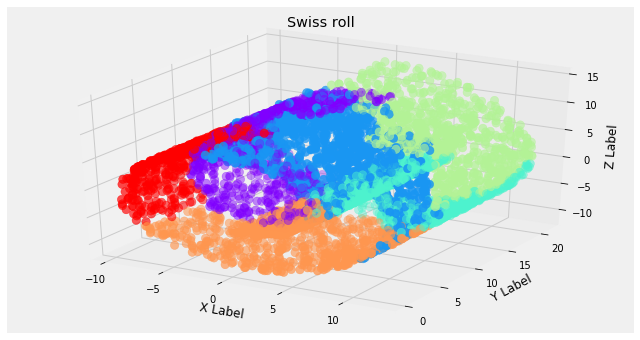

In [6]:
#%matplotlib qt
%matplotlib inline
xdim=swissrolldata['x1']
ydim=swissrolldata['x2']
zdim=swissrolldata['x3']
fig=plt.figure(figsize=(10,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(xdim,ydim,zdim,c=swissrolldata['labels'],cmap="rainbow",s=70)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.title("Swiss roll")
plt.show()

In [7]:
fig=px.scatter_3d(swissrolldata,x='x1',y='x2',z='x3',color='labels')
fig.update_traces(marker=dict(size=5,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

# Kernel functions and the kernel trick

# Linear Kernel

In [8]:
from sklearn.decomposition import KernelPCA

In [9]:
kernel=KernelPCA(n_components=2,kernel='linear')
data=swissrolldata.drop('labels',axis=1)
newdata=kernel.fit_transform(data)
newdata=pd.DataFrame(newdata,columns=['z1','z2'])
newdata['labels']=labels

In [10]:
newdata.head()

z1        z2  labels
0 -9.129445  7.314812       0
1  6.232853  4.050880       1
2 -9.633031  6.711263       0
3  4.015435 -9.785818       3
4  5.777356 -0.319892       3

In [11]:
fig=px.scatter(newdata,x='z1',y='z2',color='labels')
fig.update_traces(marker=dict(size=5,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

# Gaussian radial basis function (RBF) Kernel PCA

$ \begin{equation} \kappa(\mathbf{x_i, x_j}) = exp\bigg(- \gamma \; \lVert\mathbf{x_i - x_j }\rVert^{2}_{2} \bigg)\end{equation} $

In [12]:
kernel=KernelPCA(n_components=2,kernel='rbf',gamma=0.04)
data=swissrolldata.drop('labels',axis=1)
newdata=kernel.fit_transform(data)
newdata=pd.DataFrame(newdata,columns=['z1','z2'])
newdata['labels']=labels

In [13]:
newdata.head()

z1        z2  labels
0 -0.151563  0.009627       0
1 -0.167722 -0.269209       1
2 -0.155630  0.000781       0
3 -0.007098  0.143219       3
4 -0.125703  0.214093       3

In [14]:
fig=px.scatter(newdata,x='z2',y='z1',color='labels')
fig.update_traces(marker=dict(size=5,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

# Sigmoid kernel

In [15]:
kernel=KernelPCA(n_components=2,kernel='sigmoid')
data=swissrolldata.drop('labels',axis=1)
newdata=kernel.fit_transform(data)
newdata=pd.DataFrame(newdata,columns=['z1','z2'])
newdata['labels']=labels

In [16]:
newdata.head()

z1        z2  labels
0  0.420148  0.549154       0
1 -0.971349  0.157749       1
2  0.605773  0.642319       0
3 -0.064235 -0.433578       3
4 -0.220043 -0.039450       3

In [17]:
fig=px.scatter(newdata,x='z1',y='z2',color='labels')
fig.update_traces(marker=dict(size=5,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

# Polynomial Kernel

In [18]:
kernel=KernelPCA(n_components=2,kernel='poly')
data=swissrolldata.drop('labels',axis=1)
newdata=kernel.fit_transform(data)
newdata=pd.DataFrame(newdata,columns=['z1','z2'])
newdata['labels']=labels

In [19]:
newdata.head()

z1          z2  labels
0 -170.429178  558.738840       0
1 -421.299531 -168.386920       1
2 -391.661363  217.072018       0
3  629.995991    0.936960       3
4  825.597097 -398.748079       3

In [20]:
fig=px.scatter(newdata,x='z1',y='z2',color='labels')
fig.update_traces(marker=dict(size=5,
                              line=dict(width=1,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [22]:
clf=Pipeline([
    ("kcpa",KernelPCA(n_components=2)),
    ("logistic_regression",LogisticRegression())
            ])
param_grid=[{"kcpa__gamma":[0.02,0.04,0.05,1,10],
             "kcpa__kernel":["rbf","sigmoid","linear","poly"]
            }]
grid_search=GridSearchCV(clf,param_grid,verbose=3)
x=swissrolldata.drop('labels',axis=1)
y=swissrolldata['labels']
grid_search.fit(x,y)
print(grid_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] kcpa__gamma=0.02, kcpa__kernel=rbf ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. kcpa__gamma=0.02, kcpa__kernel=rbf, score=0.589, total=   1.4s
[CV] kcpa__gamma=0.02, kcpa__kernel=rbf ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV] .. kcpa__gamma=0.02, kcpa__kernel=rbf, score=0.580, total=   1.6s
[CV] kcpa__gamma=0.02, kcpa__kernel=rbf ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.9s remaining:    0.0s


[CV] .. kcpa__gamma=0.02, kcpa__kernel=rbf, score=0.549, total=   1.6s
[CV] kcpa__gamma=0.02, kcpa__kernel=rbf ..............................
[CV] .. kcpa__gamma=0.02, kcpa__kernel=rbf, score=0.562, total=   1.5s
[CV] kcpa__gamma=0.02, kcpa__kernel=rbf ..............................
[CV] .. kcpa__gamma=0.02, kcpa__kernel=rbf, score=0.539, total=   1.6s
[CV] kcpa__gamma=0.02, kcpa__kernel=sigmoid ..........................
[CV]  kcpa__gamma=0.02, kcpa__kernel=sigmoid, score=0.713, total=   2.0s
[CV] kcpa__gamma=0.02, kcpa__kernel=sigmoid ..........................
[CV]  kcpa__gamma=0.02, kcpa__kernel=sigmoid, score=0.707, total=   1.8s
[CV] kcpa__gamma=0.02, kcpa__kernel=sigmoid ..........................
[CV]  kcpa__gamma=0.02, kcpa__kernel=sigmoid, score=0.720, total=   1.9s
[CV] kcpa__gamma=0.02, kcpa__kernel=sigmoid ..........................
[CV]  kcpa__gamma=0.02, kcpa__kernel=sigmoid, score=0.728, total=   2.0s
[CV] kcpa__gamma=0.02, kcpa__kernel=sigmoid .........................

[CV] ..... kcpa__gamma=1, kcpa__kernel=rbf, score=0.268, total=   1.3s
[CV] kcpa__gamma=1, kcpa__kernel=rbf .................................
[CV] ..... kcpa__gamma=1, kcpa__kernel=rbf, score=0.255, total=   1.3s
[CV] kcpa__gamma=1, kcpa__kernel=rbf .................................
[CV] ..... kcpa__gamma=1, kcpa__kernel=rbf, score=0.277, total=   1.4s
[CV] kcpa__gamma=1, kcpa__kernel=rbf .................................
[CV] ..... kcpa__gamma=1, kcpa__kernel=rbf, score=0.268, total=   1.4s
[CV] kcpa__gamma=1, kcpa__kernel=rbf .................................
[CV] ..... kcpa__gamma=1, kcpa__kernel=rbf, score=0.280, total=   1.7s
[CV] kcpa__gamma=1, kcpa__kernel=sigmoid .............................
[CV] . kcpa__gamma=1, kcpa__kernel=sigmoid, score=0.774, total=   1.5s
[CV] kcpa__gamma=1, kcpa__kernel=sigmoid .............................
[CV] . kcpa__gamma=1, kcpa__kernel=sigmoid, score=0.775, total=   1.5s
[CV] kcpa__gamma=1, kcpa__kernel=sigmoid .............................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


{'kcpa__gamma': 10, 'kcpa__kernel': 'sigmoid'}


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [24]:
knn=KNeighborsClassifier(n_neighbors=5)
lg=LogisticRegression()
dc=DecisionTreeClassifier()
rnf=RandomForestClassifier(n_estimators=500)
sv=SVC()
ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=500,
                           algorithm="SAMME.R",learning_rate=0.5)
gbc=GradientBoostingClassifier()
xg=XGBClassifier()

In [25]:
dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=500),
    "adaboost":AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=500,
                           algorithm="SAMME.R",learning_rate=0.5),
    "xgboost":XGBClassifier(),
    "voting classifier":VotingClassifier(estimators=[('lr',lg),
                                        ('rf',rnf),('dt',dc),('kn',knn),
                                        ('svm',sv),('adaboost',ada),
                                        ('gbcb',gbc),('xgb',xg)],voting="hard")
}

In [26]:
no=len(dict_classifiers.keys())
def classifiers(kernel,data,labels):
    results = pd.DataFrame(data=np.zeros(shape=(no,4)),
                columns =['classifier','train_score','validation score','training_time'])
    count=0  
    for key,classifier in dict_classifiers.items():
        start = time.clock()
        ker=KernelPCA(n_components=2,kernel=kernel)
        x=ker.fit_transform(data)
        y=labels
        X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=32)
        classifier.fit(X_train, Y_train)
        y_pred=classifier.predict(X_test)
        acc=accuracy_score(y_pred,Y_test)
        train_score =classifier.score(X_train, Y_train)
        end = time.clock()
        diff = end-start
        results.loc[count,'classifier']=key
        results.loc[count,'train_score']=train_score
        results.loc[count,'validation score']=acc
        results.loc[count,'training_time']=diff
        count=count+1
    return results

In [27]:
d=swissrolldata.drop('labels',axis=1)
l=swissrolldata['labels']
kernels=['linear','rbf','sigmoid','poly']
for i in kernels:
    res=classifiers(i,d,l)
    print(f"kernel is {i}")
    print(res.sort_values(by='validation score',ascending=False))

kernel is linear
                     classifier  train_score  validation score  training_time
5                 Random Forest     1.000000            0.7872       7.005680
1             Nearest Neighbors     0.850667            0.7800       1.388006
7                       xgboost     0.979733            0.7736       2.759658
8             voting classifier     0.919200            0.7688      20.867631
4                 Decision Tree     1.000000            0.7624       1.091257
3  Gradient Boosting Classifier     0.844800            0.7112       5.536175
2                    Linear SVM     0.610133            0.5800       1.997373
0           Logistic Regression     0.583467            0.5712       1.384240
6                      adaboost     0.468800            0.4632       5.701270
kernel is rbf
                     classifier  train_score  validation score  training_time
1             Nearest Neighbors     0.741333            0.6016       2.658367
5                 Random Forest  

In [28]:
d=swissrolldata.drop('labels',axis=1)
l=swissrolldata['labels']
knn=KNeighborsClassifier(n_neighbors=5)
ker=KernelPCA(kernel="sigmoid",gamma=10,n_components=2)
x=ker.fit_transform(d)
y=labels
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8968
[[204   0   1   0   0   1]
 [  1 234   3  44   5   0]
 [  1   4 204  10   8   0]
 [  0  23   8 155   0   0]
 [  0   2  11   0 206   0]
 [  4   2   0   0   1 118]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       206
           1       0.88      0.82      0.85       287
           2       0.90      0.90      0.90       227
           3       0.74      0.83      0.78       186
           4       0.94      0.94      0.94       219
           5       0.99      0.94      0.97       125

    accuracy                           0.90      1250
   macro avg       0.90      0.90      0.90      1250
weighted avg       0.90      0.90      0.90      1250



Text(0.5, 1, 'Confusion matrix')

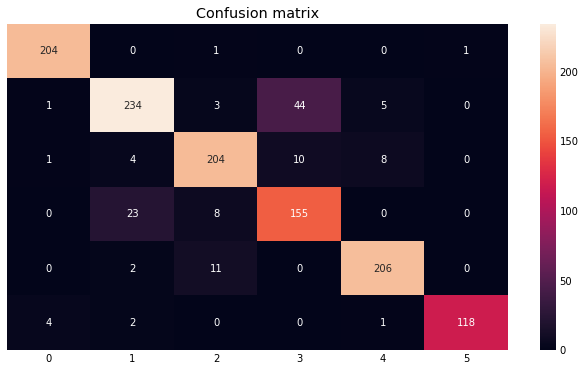

In [29]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,yticklabels=False,fmt="d")
plt.title("Confusion matrix")

In [30]:
#lets see in neural networks

In [31]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder

In [32]:
d=np.array(swissrolldata.drop('labels',axis=1))
l=np.array(swissrolldata['labels'])
encoding=OneHotEncoder()
y=encoding.fit_transform(l.reshape(-1,1))
ker=KernelPCA(kernel="sigmoid",gamma=10,n_components=2)
x=ker.fit_transform(d)
y=labels
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=32)

In [33]:
def modelcreating(optimizer="adam",loss="sparse_categorical_crossentropy"):
    model=Sequential()
    model.add(Dense(128,input_dim=2,activation="relu"))
    model.add(Dense(64,activation="relu"))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(16,activation="relu"))
    model.add(Dense(6,activation="softmax"))
    model.compile(loss=loss,optimizer=optimizer,metrics=["accuracy"])
    return model
model=modelcreating()

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 102       
Total params: 11,350
Trainable params: 11,350
Non-trainable params: 0
_________________________________________________________________


In [35]:
earlystopping=EarlyStopping(monitor="val_loss",mode="min",patience=100)

In [36]:
model.fit(x=x_train,y=y_train,
          validation_data=(x_test,y_test),
         epochs=300,batch_size=64,verbose=1,
         callbacks=[earlystopping])

Train on 3750 samples, validate on 1250 samples
Epoch 1/300
3750/3750 [==============================] - 1s 243us/sample - loss: 1.4931 - accuracy: 0.4576 - val_loss: 1.0129 - val_accuracy: 0.6120
Epoch 2/300
3750/3750 [==============================] - 0s 42us/sample - loss: 0.7764 - accuracy: 0.6467 - val_loss: 0.6737 - val_accuracy: 0.7032
Epoch 3/300
3750/3750 [==============================] - 0s 71us/sample - loss: 0.5892 - accuracy: 0.7496 - val_loss: 0.5548 - val_accuracy: 0.7776
Epoch 4/300
3750/3750 [==============================] - 0s 81us/sample - loss: 0.4924 - accuracy: 0.8064 - val_loss: 0.4929 - val_accuracy: 0.8024
Epoch 5/300
3750/3750 [==============================] - 0s 78us/sample - loss: 0.4421 - accuracy: 0.8165 - val_loss: 0.4586 - val_accuracy: 0.8128
Epoch 6/300
3750/3750 [==============================] - 0s 67us/sample - loss: 0.3970 - accuracy: 0.8352 - val_loss: 0.4154 - val_accuracy: 0.8232
Epoch 7/300
3750/3750 [==============================] - 0s 64u

Epoch 56/300
3750/3750 [==============================] - 0s 70us/sample - loss: 0.2480 - accuracy: 0.8736 - val_loss: 0.2878 - val_accuracy: 0.8504
Epoch 57/300
3750/3750 [==============================] - 0s 52us/sample - loss: 0.2505 - accuracy: 0.8733 - val_loss: 0.2745 - val_accuracy: 0.8648
Epoch 58/300
3750/3750 [==============================] - 0s 80us/sample - loss: 0.2462 - accuracy: 0.8816 - val_loss: 0.2656 - val_accuracy: 0.8648
Epoch 59/300
3750/3750 [==============================] - 0s 70us/sample - loss: 0.2547 - accuracy: 0.8725 - val_loss: 0.2823 - val_accuracy: 0.8616
Epoch 60/300
3750/3750 [==============================] - 0s 70us/sample - loss: 0.2469 - accuracy: 0.8757 - val_loss: 0.2725 - val_accuracy: 0.8624
Epoch 61/300
3750/3750 [==============================] - 0s 51us/sample - loss: 0.2540 - accuracy: 0.8693 - val_loss: 0.2769 - val_accuracy: 0.8632
Epoch 62/300
3750/3750 [==============================] - 0s 66us/sample - loss: 0.2489 - accuracy: 0.8784

3750/3750 [==============================] - 0s 50us/sample - loss: 0.2313 - accuracy: 0.8827 - val_loss: 0.2517 - val_accuracy: 0.8736
Epoch 111/300
3750/3750 [==============================] - 0s 64us/sample - loss: 0.2396 - accuracy: 0.8781 - val_loss: 0.2524 - val_accuracy: 0.8728
Epoch 112/300
3750/3750 [==============================] - 0s 66us/sample - loss: 0.2307 - accuracy: 0.8813 - val_loss: 0.2543 - val_accuracy: 0.8704
Epoch 113/300
3750/3750 [==============================] - 0s 64us/sample - loss: 0.2296 - accuracy: 0.8840 - val_loss: 0.2600 - val_accuracy: 0.8656
Epoch 114/300
3750/3750 [==============================] - 0s 51us/sample - loss: 0.2377 - accuracy: 0.8803 - val_loss: 0.2531 - val_accuracy: 0.8712
Epoch 115/300
3750/3750 [==============================] - 0s 66us/sample - loss: 0.2271 - accuracy: 0.8861 - val_loss: 0.2878 - val_accuracy: 0.8688
Epoch 116/300
3750/3750 [==============================] - 0s 65us/sample - loss: 0.2511 - accuracy: 0.8760 - val_

3750/3750 [==============================] - 0s 65us/sample - loss: 0.2173 - accuracy: 0.8893 - val_loss: 0.2339 - val_accuracy: 0.8848
Epoch 165/300
3750/3750 [==============================] - 0s 51us/sample - loss: 0.2209 - accuracy: 0.8899 - val_loss: 0.2649 - val_accuracy: 0.8704
Epoch 166/300
3750/3750 [==============================] - 0s 65us/sample - loss: 0.2183 - accuracy: 0.8907 - val_loss: 0.2416 - val_accuracy: 0.8688
Epoch 167/300
3750/3750 [==============================] - 0s 68us/sample - loss: 0.2192 - accuracy: 0.8933 - val_loss: 0.2375 - val_accuracy: 0.8784
Epoch 168/300
3750/3750 [==============================] - 0s 65us/sample - loss: 0.2172 - accuracy: 0.8877 - val_loss: 0.2443 - val_accuracy: 0.8864
Epoch 169/300
3750/3750 [==============================] - 0s 50us/sample - loss: 0.2157 - accuracy: 0.8869 - val_loss: 0.2629 - val_accuracy: 0.8632
Epoch 170/300
3750/3750 [==============================] - 0s 66us/sample - loss: 0.2222 - accuracy: 0.8875 - val_

Epoch 219/300
3750/3750 [==============================] - 0s 76us/sample - loss: 0.2060 - accuracy: 0.8955 - val_loss: 0.2542 - val_accuracy: 0.8696
Epoch 220/300
3750/3750 [==============================] - 0s 72us/sample - loss: 0.2135 - accuracy: 0.8904 - val_loss: 0.2517 - val_accuracy: 0.8664
Epoch 221/300
3750/3750 [==============================] - 0s 70us/sample - loss: 0.2167 - accuracy: 0.8888 - val_loss: 0.2412 - val_accuracy: 0.8784
Epoch 222/300
3750/3750 [==============================] - 0s 48us/sample - loss: 0.2120 - accuracy: 0.8904 - val_loss: 0.2286 - val_accuracy: 0.8848
Epoch 223/300
3750/3750 [==============================] - 0s 65us/sample - loss: 0.2136 - accuracy: 0.8875 - val_loss: 0.2392 - val_accuracy: 0.8768
Epoch 224/300
3750/3750 [==============================] - 0s 74us/sample - loss: 0.2057 - accuracy: 0.8973 - val_loss: 0.2351 - val_accuracy: 0.8840
Epoch 225/300
3750/3750 [==============================] - 0s 79us/sample - loss: 0.2075 - accuracy:

3750/3750 [==============================] - 0s 65us/sample - loss: 0.2049 - accuracy: 0.8957 - val_loss: 0.2329 - val_accuracy: 0.8880
Epoch 274/300
3750/3750 [==============================] - 0s 53us/sample - loss: 0.2129 - accuracy: 0.8920 - val_loss: 0.2239 - val_accuracy: 0.8904
Epoch 275/300
3750/3750 [==============================] - 0s 62us/sample - loss: 0.2034 - accuracy: 0.8971 - val_loss: 0.2335 - val_accuracy: 0.8816
Epoch 276/300
3750/3750 [==============================] - 0s 73us/sample - loss: 0.2027 - accuracy: 0.8989 - val_loss: 0.2256 - val_accuracy: 0.8872
Epoch 277/300
3750/3750 [==============================] - 0s 66us/sample - loss: 0.2080 - accuracy: 0.8907 - val_loss: 0.2447 - val_accuracy: 0.8864
Epoch 278/300
3750/3750 [==============================] - 0s 58us/sample - loss: 0.2084 - accuracy: 0.8979 - val_loss: 0.2337 - val_accuracy: 0.8776
Epoch 279/300
3750/3750 [==============================] - 0s 61us/sample - loss: 0.2058 - accuracy: 0.8949 - val_

In [37]:
loss=pd.DataFrame(model.history.history)
loss.tail()

loss  accuracy  val_loss  val_accuracy
295  0.209969  0.893867  0.251490        0.8656
296  0.204282  0.892000  0.246813        0.8880
297  0.208887  0.894400  0.236864        0.8952
298  0.201073  0.897600  0.232672        0.8888
299  0.201313  0.900267  0.226974        0.8928

<Figure size 720x432 with 0 Axes>

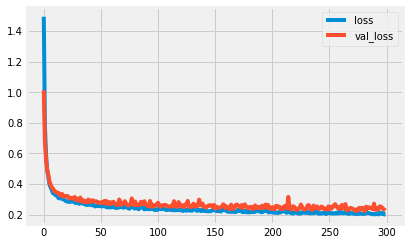

In [38]:
plt.figure(figsize=(10,6))
loss[["loss","val_loss"]].plot()

<Figure size 720x432 with 0 Axes>

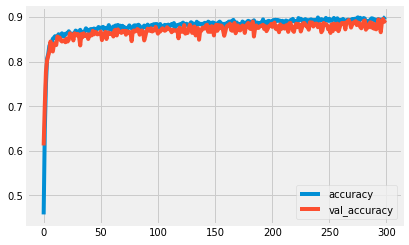

In [39]:
plt.figure(figsize=(10,6))
loss[["accuracy","val_accuracy"]].plot()

In [40]:
y_pred=model.predict_classes(x_test)
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8928
[[203   0   0   0   1   2]
 [  3 219   3  59   3   0]
 [  1   3 198  14  11   0]
 [  0   9   8 169   0   0]
 [  1   4   9   0 205   0]
 [  1   1   0   0   1 122]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       206
           1       0.93      0.76      0.84       287
           2       0.91      0.87      0.89       227
           3       0.70      0.91      0.79       186
           4       0.93      0.94      0.93       219
           5       0.98      0.98      0.98       125

    accuracy                           0.89      1250
   macro avg       0.90      0.91      0.90      1250
weighted avg       0.90      0.89      0.89      1250

